**SALSABILA HANISAPUTRI 4212201028 MK5A PAGI**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix

**Pemanggilan datasets**

In [8]:
train_data = pd.read_csv('/content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/content/emnist-bymerge-test.csv', header=None)

**Pembagian sampel dan perubahan bilangan ke images**

In [9]:
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = train_data.iloc[:, 0].values.astype('int')
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')

n_samples = 1000
start_samples = 2000
stop_samples = start_samples + n_samples
if len(X_train) > stop_samples:
    X_train = X_train[start_samples:stop_samples]
    y_train = y_train[start_samples:stop_samples]

if len(X_test) > stop_samples:
    X_test = X_test[start_samples:stop_samples]
    y_test = y_test[start_samples:stop_samples]

**Fitur HOG Ekstraksi Dataset**

In [10]:
hog_features_train = []
hog_images_train = []
for image in X_train:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations = 9,
                           pixels_per_cell = (8,8),
                           cells_per_block = (2,2),
                           visualize = True,
                           block_norm = 'L2')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)
hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

hog_features_test = []
hog_images_test = []
for image in X_test:
    feature, hog_img = hog(image.reshape((28, 28)),
                           orientations = 9,
                           pixels_per_cell = (8,8),
                           cells_per_block = (2,2),
                           visualize = True,
                           block_norm = 'L2')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

**HOG Normalisasi Data**

In [15]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

**SVM Klasifikasi Data**

In [11]:
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

**Evaluasi performa menggunakan LOOCV dengan menampilkan confussion matrix, accuracy, precision dan F1-score**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[27  1  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 [ 0  0 62 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 12  1]
 [ 0  2  1 ...  0  0 17]]
Accuracy: 0.661
Precision: 0.5921871184493621
F1-Score: 0.6072855825275905


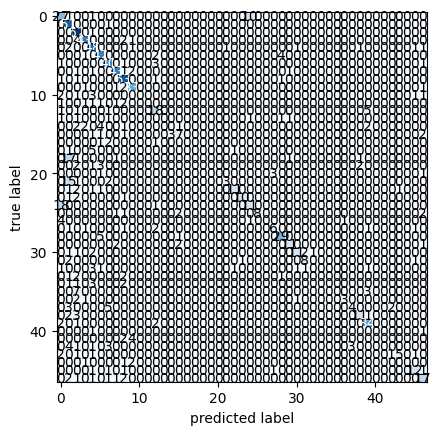

In [16]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)

conf_matrix = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix)
plt.show()

**Perbandingan Gambar Original dan fitur HOG**

In [18]:
def plot_images_with_hog(X, hog_images, title=""):
    fig, axes = plt.subplots(2, 10, figsize=(15, 5))
    fig.suptitle(title)

    # Plot original images
    for i in range(min(len(X), 10)):
        axes[0, i].imshow(X[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot HOG images
    for i in range(min(len(hog_images), 10)):
        axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

def extract_hog_images(images):
    hog_images = []
    for image in images:
        _, hog_img = hog(image.reshape((28, 28)),
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         visualize=True,
                         block_norm='L2')
        hog_images.append(hog_img)
    return np.array(hog_images)

In [19]:
hog_images_train = extract_hog_images(X_train)

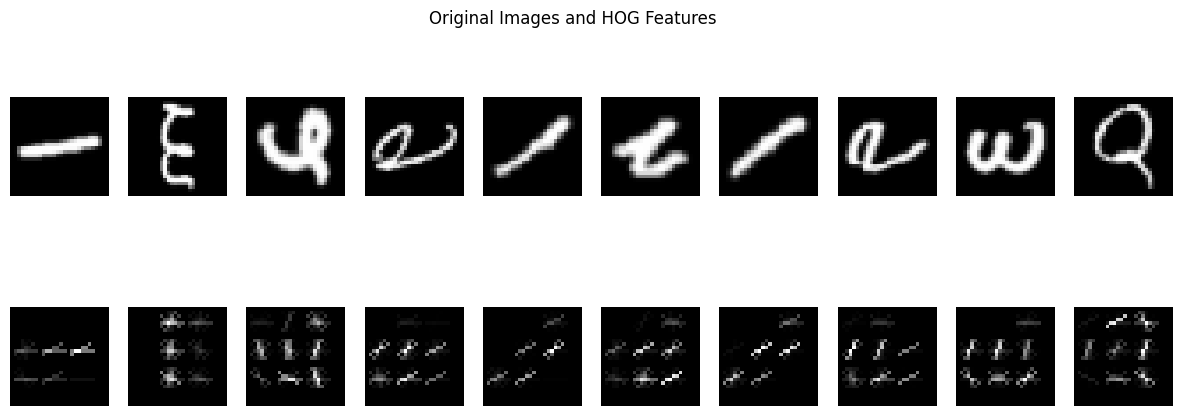

In [20]:
plot_images_with_hog(X_train, hog_images_train, title="Original Images and HOG Features")